<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/bigdataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astroML
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Get SDSS SSPP data
from astroML.datasets import fetch_sdss_sspp
data = fetch_sdss_sspp()

# do some reasonable magnitude cuts
rpsf = data['rpsf']
data = data[(rpsf > 15) & (rpsf < 19)]

# get the desired data
logg = data['logg']
Teff = data['Teff']
FeH = data['FeH']


Text(0, 0.5, 'log(g)')

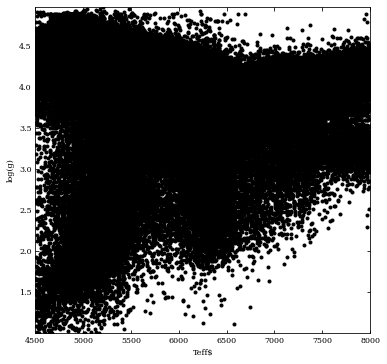

In [3]:
# Create figure and subplots
fig = plt.figure(figsize=(6, 6))


plt.plot(Teff, logg, 'k.')
plt.xlabel(r'Teff$')
plt.ylabel(r'log(g)')


Text(0, 0.5, 'log(g)')

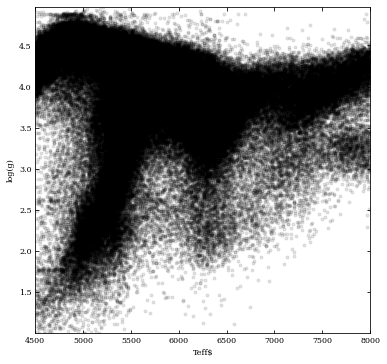

In [4]:
# alpha channel
fig = plt.figure(figsize=(6, 6))


plt.plot(Teff, logg, 'k.', alpha=0.1)
plt.xlabel(r'Teff$')
plt.ylabel(r'log(g)')


Text(0, 0.5, 'log(g)')

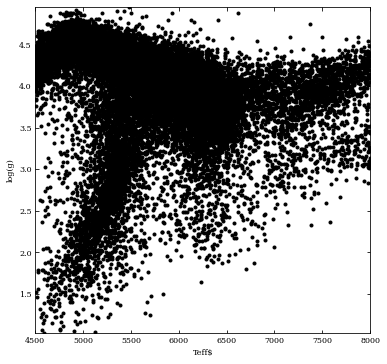

In [5]:
# subsample
# Create figure and subplots
fig = plt.figure(figsize=(6, 6))


plt.plot(Teff[::10], logg[::10], 'k.')
plt.xlabel(r'Teff$')
plt.ylabel(r'log(g)')


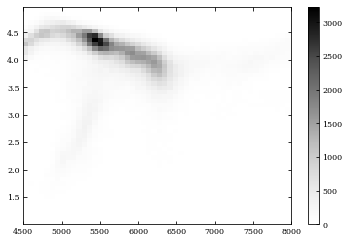

In [27]:
plt.hist2d(Teff, logg, bins=(50, 50), cmap=plt.cm.Greys)
plt.colorbar()


KeyboardInterrupt: ignored

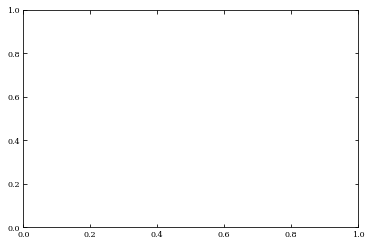

In [22]:
import seaborn as sns
sns.kdeplot(Teff, logg)
#sns.plt.show()
 
# Custom it with the same argument as 1D density plot
sns.kdeplot(Teff, logg, cmap="Reds", shade=True, bw=.15)
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(Teff, logg, cmap="Blues", shade=True, shade_lowest=True, )
sns.plt.show()


In [0]:
#ax.imshow(Z, extent=[4500, 8000, 1, 5],
#           origin='lower', aspect='auto',
#          cmap='RdGy', alpha=0.5)
#plt.colorbar();


Text(0, 0.5, 'log(g)')

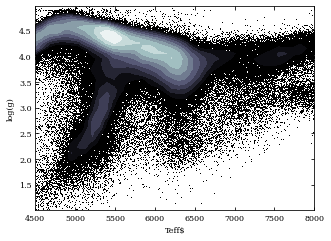

In [9]:
from astroML.plotting import scatter_contour
fig, ax = plt.subplots(figsize=(5, 3.75))
scatter_contour(Teff, logg, threshold=200, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))


#ax.set_xlim(-0.6, 2.5)
#ax.set_ylim(-0.6, 2.5)


plt.xlabel(r'Teff$')
plt.ylabel(r'log(g)')


In [0]:

#------------------------------------------------------------
# Plot the results using the binned_statistic function
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                        'count', bins=100)
FeH_mean, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                               'mean', bins=100)


# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.copper
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)


/usr/local/lib/python3.6/dist-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log10


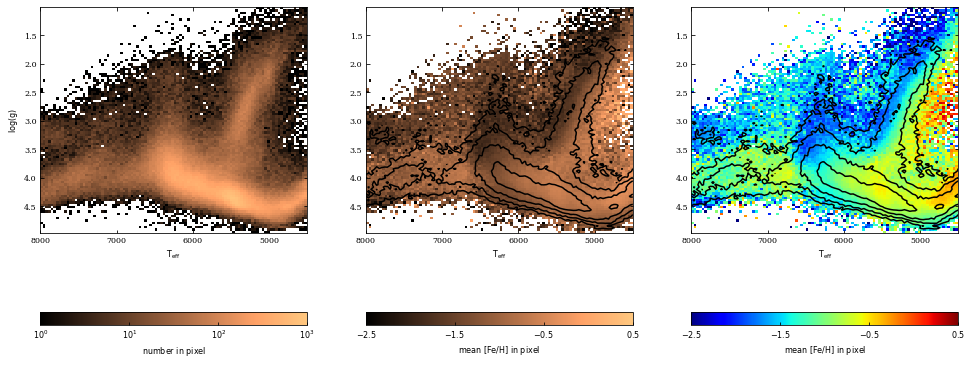

In [18]:
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                        'count', bins=100)
FeH_mean, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                               'mean', bins=100)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.copper
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

# Create figure and subplots
fig = plt.figure(figsize=(15, 6))
fig.subplots_adjust(wspace=0.22, left=0.1, right=0.95,
                    bottom=0.12, top=0.95)

#--------------------
# First axes:
ax = plt.subplot(131, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')
plt.ylabel(r'$\mathrm{log(g)}$')

cb = plt.colorbar(ticks=[0, 1, 2, 3], pad=0.22,
                  format=r'$10^{%i}$', orientation='horizontal')
cb.set_label(r'$\mathrm{number\ in\ pixel}$')
plt.clim(0, 3)

#--------------------
# Second axes:
ax = plt.subplot(132, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.22,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

#--------------------
# Third axes:
ax = plt.subplot(133, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap_multicolor)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.22,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

plt.show()


/usr/local/lib/python3.6/dist-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log10


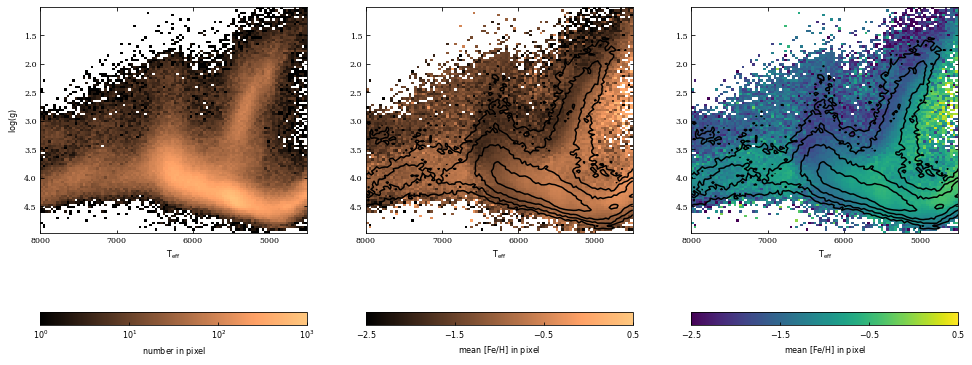

In [19]:
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                        'count', bins=100)
FeH_mean, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                               'mean', bins=100)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.copper
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

# Create figure and subplots
fig = plt.figure(figsize=(15, 6))
fig.subplots_adjust(wspace=0.22, left=0.1, right=0.95,
                    bottom=0.12, top=0.95)

#--------------------
# First axes:
ax = plt.subplot(131, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')
plt.ylabel(r'$\mathrm{log(g)}$')

cb = plt.colorbar(ticks=[0, 1, 2, 3], pad=0.22,
                  format=r'$10^{%i}$', orientation='horizontal')
cb.set_label(r'$\mathrm{number\ in\ pixel}$')
plt.clim(0, 3)

#--------------------
# Second axes:
ax = plt.subplot(132, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.22,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

#--------------------
# Third axes:
ax = plt.subplot(133, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap="viridis")
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.22,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

plt.show()

